<a href="https://colab.research.google.com/github/Chaithanyack1903/image-classifier/blob/main/minor_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import os
import random

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
%matplotlib inline

In [ ]:
TrainingImagepath='/content/drive/MyDrive/Data base/ImageClassification/train'
TestingImagepath='/content/drive/MyDrive/Data base/ImageClassification/test'
validationImagepath='/content/drive/MyDrive/Data base/ImageClassification/valid'

train_datagen = ImageDataGenerator(
    rescale=1./225,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    TrainingImagepath,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    TestingImagepath,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

valid_set = test_datagen.flow_from_directory(
    validationImagepath,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')



Found 176 images belonging to 5 classes.
Found 176 images belonging to 4 classes.
Found 176 images belonging to 4 classes.


In [ ]:
def showimages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagepath, class_name)
    try:
      image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
    except:
      image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
      plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

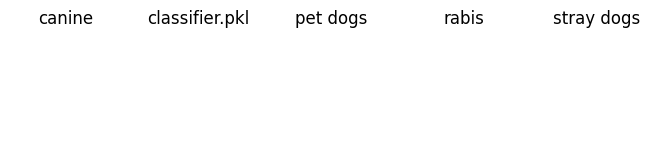

In [ ]:
plt.figure(figsize=(10,10))
for labels,number in training_set.class_indices.items():
  plt.subplot(6,6,number+1)
  showimages(labels)

In [ ]:
test_set.class_indices

{'canine distemper': 0, 'pet dogs': 1, 'rabis': 2, 'stray dogs': 3}

In [ ]:
Trainingclasses=training_set.class_indices

ResultMap={}
for dogsvalue,dogsname in zip(Trainingclasses.values(),Trainingclasses.keys()):
  ResultMap[dogsvalue]=dogsname

  import pickle
  with open("/content/drive/MyDrive/Data base/ImageClassification/ResultMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

    print("Mapping of Face and its ID",ResultMap)

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons:', OutputNeurons)

Mapping of Face and its ID {0: 'canine'}
Mapping of Face and its ID {0: 'canine', 1: 'pet dogs'}
Mapping of Face and its ID {0: 'canine', 1: 'pet dogs', 2: 'rabis'}
Mapping of Face and its ID {0: 'canine', 1: 'pet dogs', 2: 'rabis', 3: 'stray dogs'}

 The Number of output neurons: 4


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()

classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
import time
StartTime=time.time()
model_history=classifier.fit_generator(
                                      training_set,
                                      steps_per_epoch=len(training_set),
                                      epochs=20,
                                      validation_data=valid_set,
                                      validation_steps=len(valid_set),
                                      verbose=1
)
EndTime=time.time()
print("########### Total Time Taken:", round(EndTime-StartTime)/60, 'Minutes###########')

<ipython-input-16-142d11495675>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 8.9155 - accuracy: 0.3580 

InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-16-142d11495675>", line 3, in <cell line: 3>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2913, in fit_generator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,5] labels_size=[32,4]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_1113]

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training vs Validation accuracy')

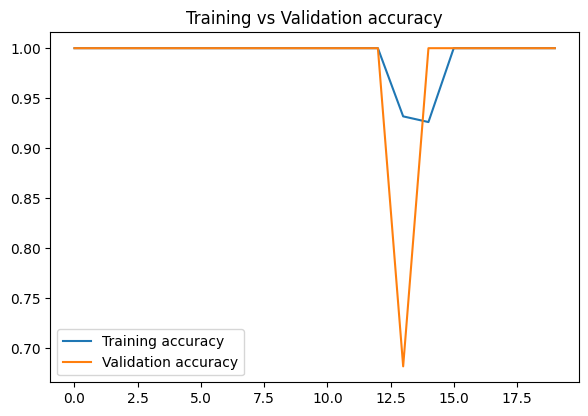

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label = "Validation accuracy")
plt.legend()
plt.title("Training vs Validation accuracy")

In [ ]:
classifier.save("/content/drive/MyDrive/Data base/ImageClassification/train/classifier.pkl")

In [ ]:
import cv2

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


true_labels = test_set.classes


predictions = classifier.predict(test_set)


predicted_labels = np.argmax(predictions, axis=1)


cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_set.class_indices.keys()))


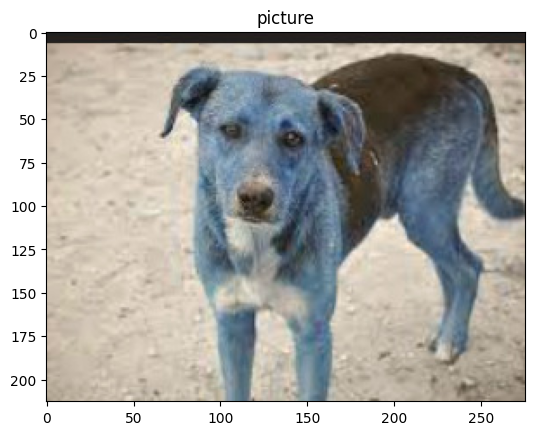

###################################
prediction is : stray dogs


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
testImage="/content/drive/MyDrive/Data base/ImageClassification/test/stray dogs/sd10.jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('#####'*7)
print('prediction is :' ,ResultMap[np.argmax(result)])

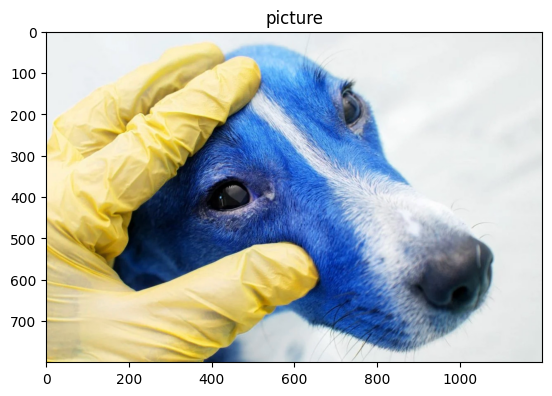

###################################
prediction is : canine


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
testImage="/content/drive/MyDrive/Data base/ImageClassification/test/canine distemper/canine 1.jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('#####'*7)
print('prediction is :' ,ResultMap[np.argmax(result)])